<a href="https://colab.research.google.com/github/pratibha366/-SCT-task-1/blob/main/Online_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose your Excel file when prompted


Saving OnlineRetail (1) (1).xlsx to OnlineRetail (1) (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded file
file_path = list(uploaded.keys())[0]  # Automatically gets the uploaded file name
data = pd.read_excel(file_path)

# Display basic info
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Drop missing values
data = data.dropna(subset=['CustomerID'])

# Convert CustomerID to integer
data['CustomerID'] = data['CustomerID'].astype(int)

# Remove cancelled orders (InvoiceNo starting with 'C')
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative or zero quantities
data = data[data['Quantity'] > 0]

print("Cleaned Dataset Shape:", data.shape)


Cleaned Dataset Shape: (397924, 8)


In [ ]:
# Create a pivot table: rows = CustomerID, columns = Description (Product)
user_item_matrix = data.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

user_item_matrix.head()


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity between items
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=user_item_matrix.columns,
                                  columns=user_item_matrix.columns)


In [ ]:
def recommend_products(product_name, n_recommendations=5):
    if product_name not in item_similarity_df.columns:
        print("Product not found in dataset.")
        return []

    # Get similarity scores
    similar_items = item_similarity_df[product_name].sort_values(ascending=False)

    # Exclude the same product itself
    top_items = similar_items.iloc[1:n_recommendations+1]

    print(f"\nBecause you liked '{product_name}', you may also like:\n")
    for i, (item, score) in enumerate(top_items.items(), start=1):
        print(f"{i}. {item} (Similarity: {score:.2f})")


In [ ]:
# Example test product
recommend_products("WHITE HANGING HEART T-LIGHT HOLDER")




Because you liked 'WHITE HANGING HEART T-LIGHT HOLDER', you may also like:

1. GIN + TONIC DIET METAL SIGN (Similarity: 0.75)
2. RED HANGING HEART T-LIGHT HOLDER (Similarity: 0.66)
3. WASHROOM METAL SIGN (Similarity: 0.64)
4. LAUNDRY 15C METAL SIGN (Similarity: 0.64)
5. GREEN VINTAGE SPOT BEAKER (Similarity: 0.63)


/tmp/ipython-input-2081097384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


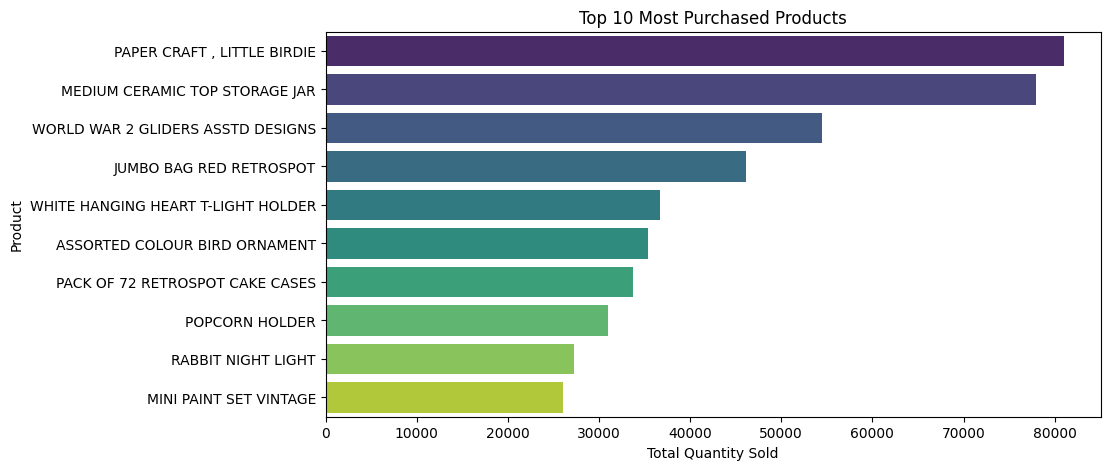

In [ ]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product")
plt.show()
